# Time Series Dataset Generator - Quick Start Guide

This notebook demonstrates the basic usage of the Time Series Dataset Generator library.

## What You'll Learn:
1. Generate different types of time series
2. Load and inspect generated data
3. Visualize time series
4. Analyze statistical properties


## Setup


In [33]:
import sys
from pathlib import Path
import numpy as np
import pandas as pd
import random
import warnings
warnings.filterwarnings('ignore')

# Set random seed for reproducibility
RANDOM_SEED = 42
random.seed(RANDOM_SEED)
np.random.seed(RANDOM_SEED)

# Import the library
from timeseries_dataset_generator import TimeSeriesGenerator
from timeseries_dataset_generator.generators import (
    generate_ar_dataset,
    generate_linear_trend_dataset,
    generate_point_anomaly_dataset,
    generate_single_seasonality_dataset,
    generate_garch_dataset
)

# Import visualization tools
from timeseries_dataset_generator.utils.visualization import (
    plot_single_series,
    plot_multiple_series,
    create_dashboard,
    plot_acf_pacf
)

# Import analysis tools
from timeseries_dataset_generator.utils.analysis import (
    analyze_dataset_summary,
    test_stationarity,
    detect_seasonality
)

print("✓ Setup complete!")


✓ Setup complete!


## 1. Generate Time Series Data

Let's generate different types of time series.


In [34]:
# Create output directory
output_dir = Path("notebook_output")
output_dir.mkdir(exist_ok=True)

print("Generating time series datasets...\n")

# 1. AR (Autoregressive) Process
print("1. AR Process (stationary)")
generate_ar_dataset(
    TimeSeriesGenerator,
    folder=str(output_dir / "ar"),
    count=3,
    length_range=(200, 300)
)

# 2. Linear Trend
print("2. Linear Trend (non-stationary)")
generate_linear_trend_dataset(
    TimeSeriesGenerator,
    folder=str(output_dir / "trend"),
    kind='ar',
    count=3,
    length_range=(200, 300),
    sign=1  # upward trend
)

# 3. Seasonal Pattern
print("3. Seasonal Pattern")
generate_single_seasonality_dataset(
    TimeSeriesGenerator,
    folder=str(output_dir / "seasonal"),
    count=3,
    length_range=(200, 300)
)

# 4. GARCH (Volatility Clustering)
print("4. GARCH (volatility clustering)")
generate_garch_dataset(
    TimeSeriesGenerator,
    folder=str(output_dir / "garch"),
    count=3,
    length_range=(200, 300)
)

# 5. Point Anomaly
print("5. Point Anomaly")
generate_point_anomaly_dataset(
    TimeSeriesGenerator,
    folder=str(output_dir / "anomaly"),
    kind='ar',
    count=3,
    length_range=(200, 300),
    anomaly_type='single',
    location='middle'
)

print("\n✓ All datasets generated!")


Generating time series datasets...

1. AR Process (stationary)
3 'ar_long' series saved in ONE file: 'notebook_output/ar.parquet'
2. Linear Trend (non-stationary)
3 'ar_linear_trend_long_up' series saved in ONE file: 'notebook_output/trend.parquet'
3. Seasonal Pattern
3 'single_seasonality_long' series saved in ONE file: 'notebook_output/seasonal.parquet'
4. GARCH (volatility clustering)
3 'garch_long' series saved in ONE file: 'notebook_output/garch.parquet'
5. Point Anomaly
3 'ar_single_point_anomaly_middle_long' series saved in ONE file: 'notebook_output/anomaly.parquet'

✓ All datasets generated!


## 2. Load and Inspect Data

Let's load one of the generated datasets and explore its structure.


In [35]:
# Load AR dataset
df = pd.read_parquet(output_dir / 'ar.parquet')

print(f"Dataset shape: {df.shape}")
print(f"Number of series: {df['series_id'].nunique()}")
print(f"\nColumns: {list(df.columns)}")
print(f"\nFirst few rows:")
df.head(10)


Dataset shape: (731, 50)
Number of series: 3

Columns: ['series_id', 'time', 'data', 'length', 'is_stationary', 'base_series', 'order', 'base_coefs', 'linear_trend_up', 'linear_trend_down', 'quadratic_trend', 'cubic_trend', 'exponential_trend', 'damped_trend', 'stochastic_trend', 'difference', 'seasonality', 'multiple_seasonality', 'seasonality_from_base', 'seasonality_frequency', 'seasonal_difference', 'volatility', 'mean_shift_increase', 'mean_shift_decrease', 'multi_mean_shift', 'variance_shift_increase', 'variance_shift_decrease', 'multi_variance_shift', 'trend_shift_slope', 'trend_shift_intercept', 'multi_trend_shift', 'point_anomaly', 'collective_anomaly', 'contextual_anomaly', 'multi_point_anomaly', 'multi_collective_anomaly', 'multi_contextual_anomaly', 'location_point', 'location_collective', 'location_mean_shift', 'location_variance_shift', 'location_trend_shift', 'location_contextual', 'location_point_pts', 'location_collective_pts', 'location_mean_pts', 'location_contextual

,series_id,time,data,length,is_stationary,base_series,order,base_coefs,linear_trend_up,linear_trend_down,...,location_variance_shift,location_trend_shift,location_contextual,location_point_pts,location_collective_pts,location_mean_pts,location_contextual_pts,location_variance_pts,location_trend_pts,label
0,1,0,-0.528110,251,1,ar,(3),([ 0.5034438 0.17433028 -0.09750104]),0,0,...,0,0,0,0,0,0,0,0,0,ar_long
1,1,1,-0.661856,251,1,ar,(3),([ 0.5034438 0.17433028 -0.09750104]),0,0,...,0,0,0,0,0,0,0,0,0,ar_long
2,1,2,-1.392706,251,1,ar,(3),([ 0.5034438 0.17433028 -0.09750104]),0,0,...,0,0,0,0,0,0,0,0,0,ar_long
3,1,3,-1.001531,251,1,ar,(3),([ 0.5034438 0.17433028 -0.09750104]),0,0,...,0,0,0,0,0,0,0,0,0,ar_long
4,1,4,-0.595340,251,1,ar,(3),([ 0.5034438 0.17433028 -0.09750104]),0,0,...,0,0,0,0,0,0,0,0,0,ar_long
5,1,5,-0.423550,251,1,ar,(3),([ 0.5034438 0.17433028 -0.09750104]),0,0,...,0,0,0,0,0,0,0,0,0,ar_long
6,1,6,0.529138,251,1,ar,(3),([ 0.5034438 0.17433028 -0.09750104]),0,0,...,0,0,0,0,0,0,0,0,0,ar_long
7,1,7,-0.240340,251,1,ar,(3),([ 0.5034438 0.17433028 -0.09750104]),0,0,...,0,0,0,0,0,0,0,0,0,ar_long
8,1,8,0.632017,251,1,ar,(3),([ 0.5034438 0.17433028 -0.09750104]),0,0,...,0,0,0,0,0,0,0,0,0,ar_long
9,1,9,1.432700,251,1,ar,(3),([ 0.5034438 0.17433028 -0.09750104]),0,0,...,0,0,0,0,0,0,0,0,0,ar_long


In [36]:
# Show basic statistics
print("Basic statistics for the time series values:")
df['data'].describe()


Basic statistics for the time series values:


count    7.310000e+02
mean     7.290110e-18
std      1.000685e+00
min     -2.755351e+00
25%     -6.699966e-01
50%     -4.391846e-02
75%      6.361829e-01
max      3.333464e+00
Name: data, dtype: float64

## 3. Visualize Time Series

### 3.1 Single Series Plot


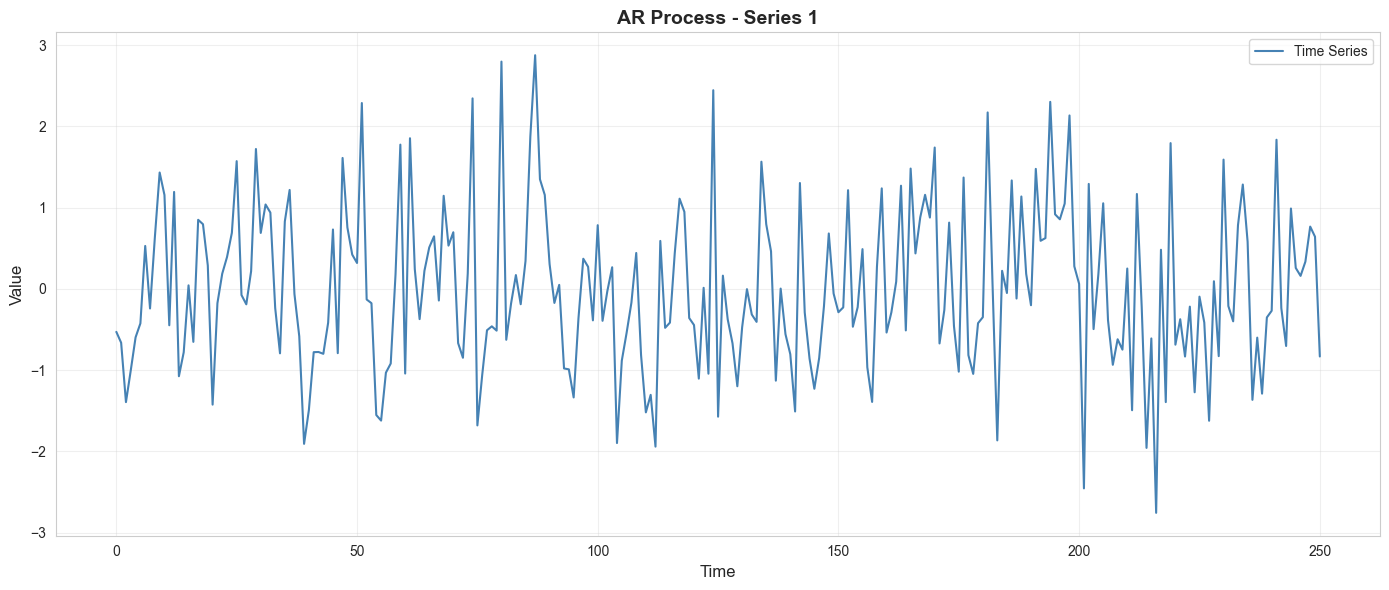

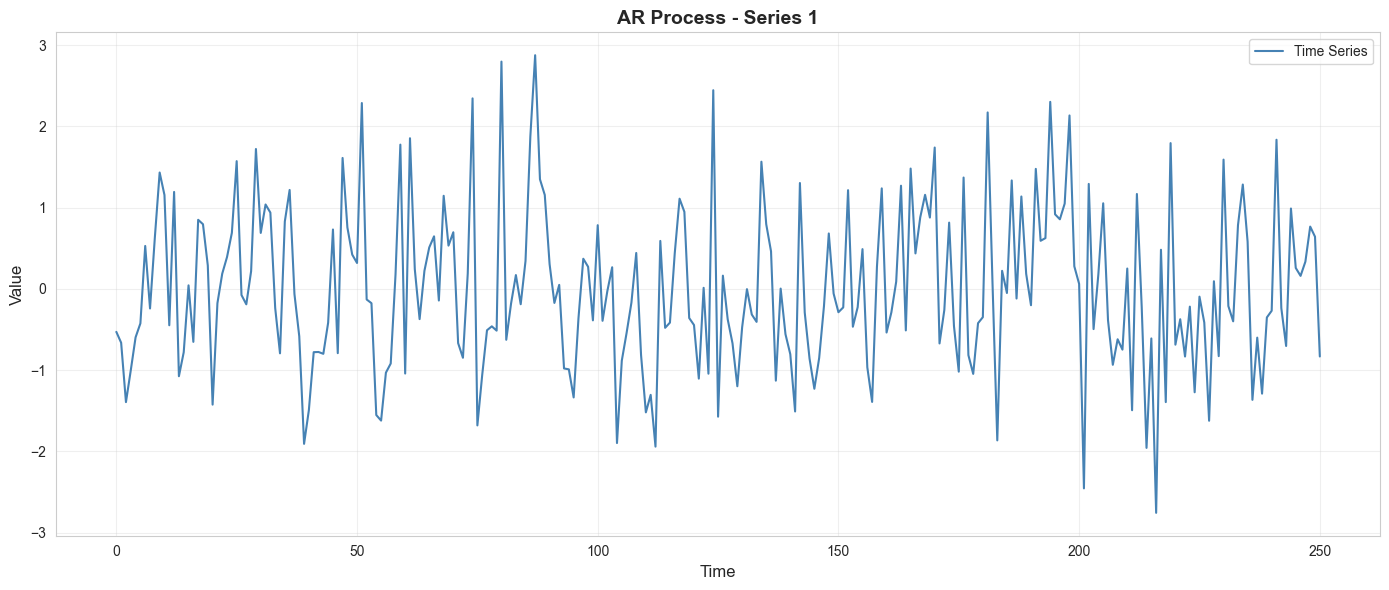

In [39]:
# Plot a single time series
series_id = df['series_id'].iloc[0]
plot_single_series(
    df,
    series_id=series_id,
    title=f"AR Process - Series {series_id}",
    save_path=None  # Show in notebook
)


### 3.2 Multiple Series Comparison


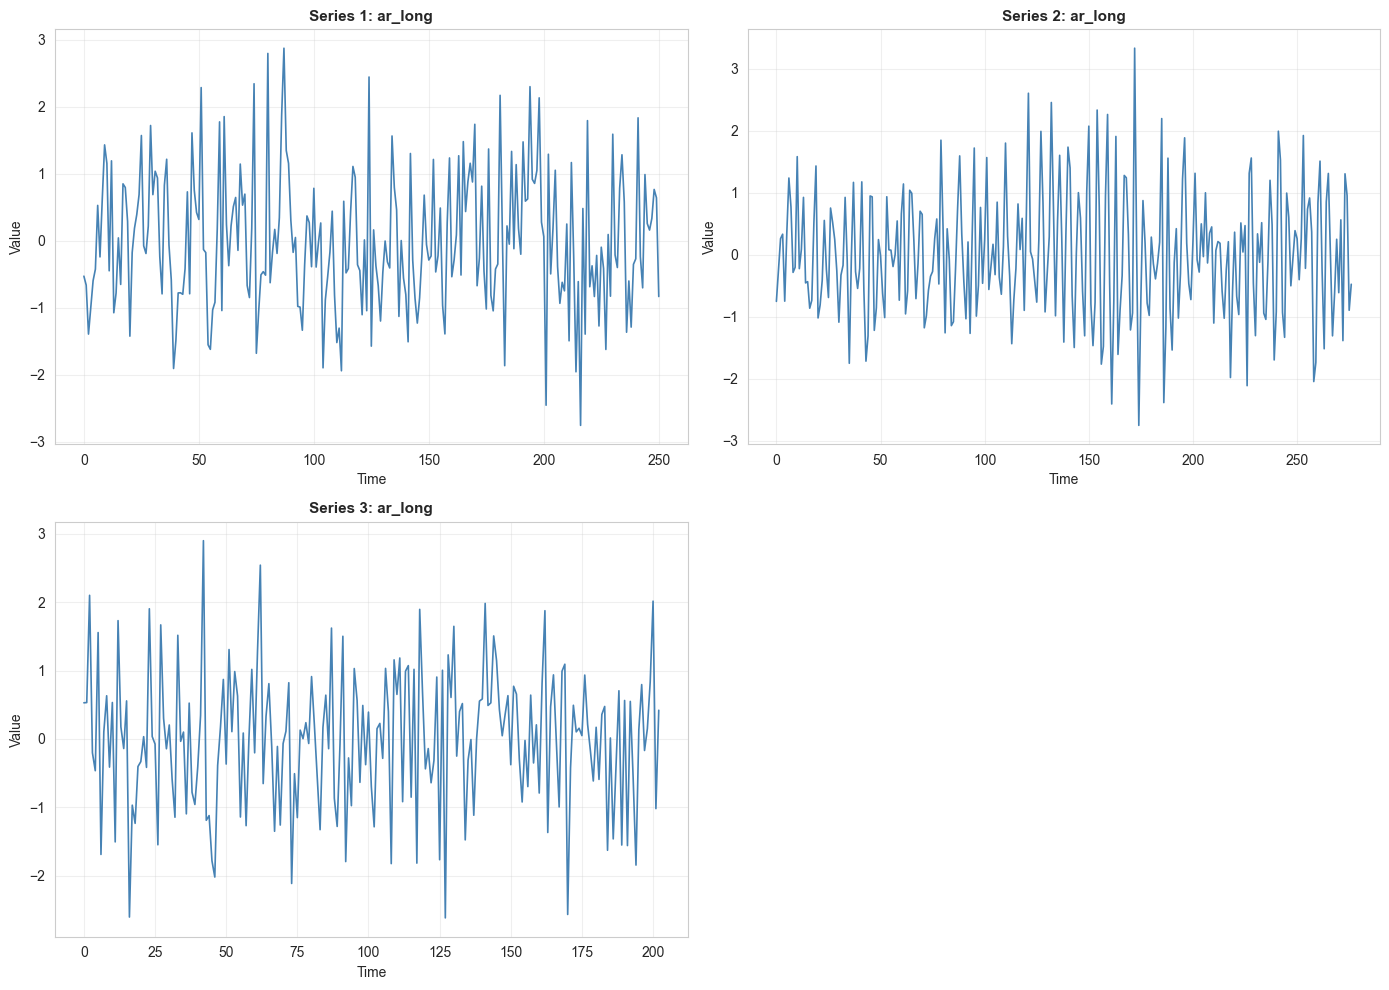

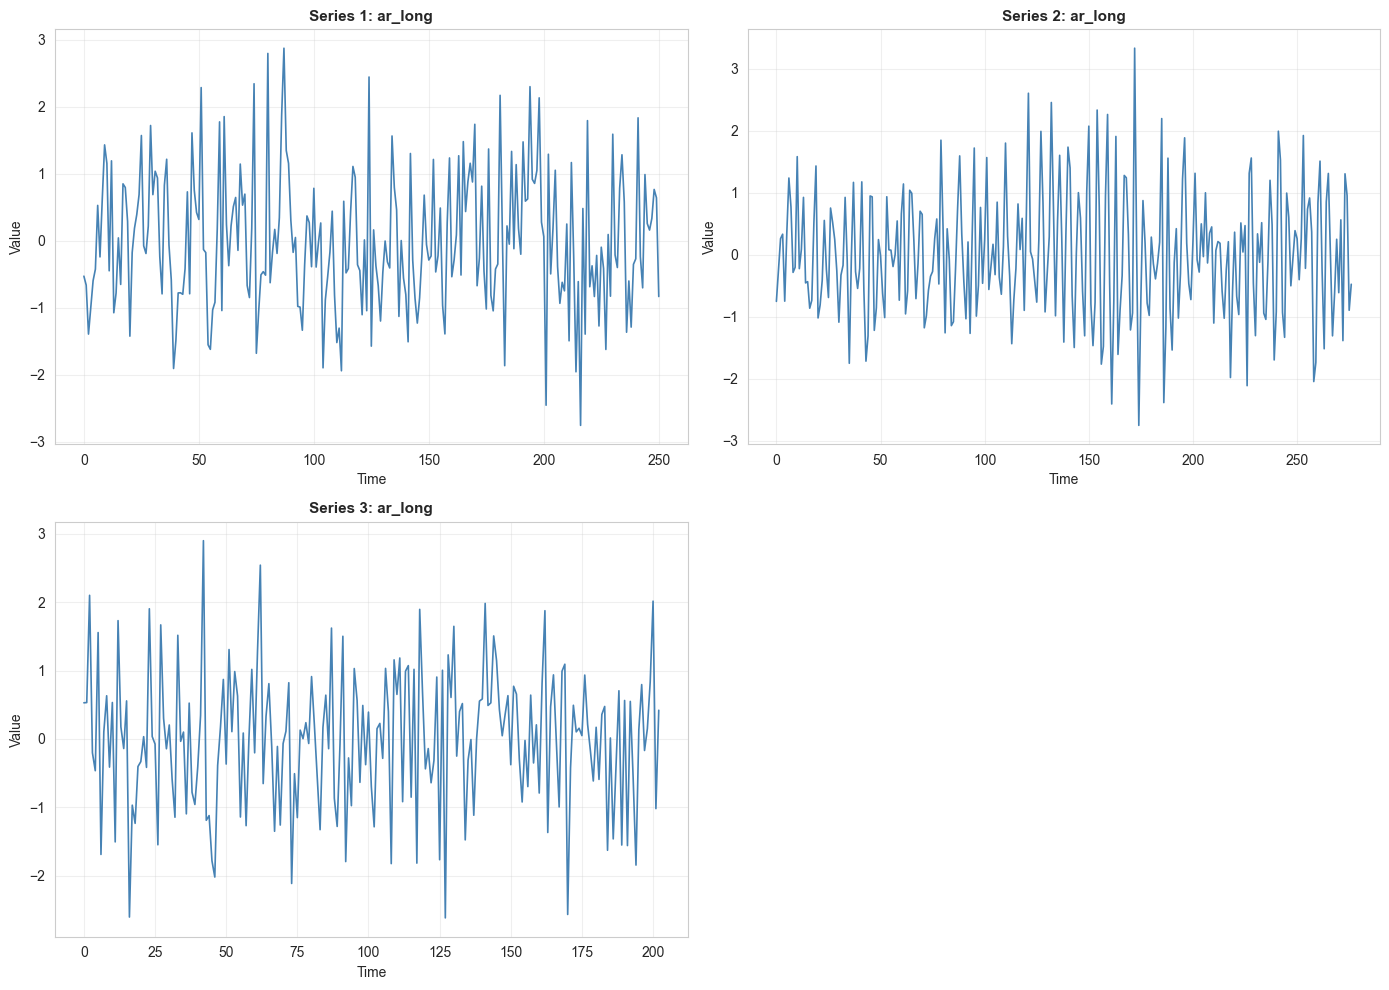

In [40]:
# Plot multiple series in a grid
plot_multiple_series(
    df,
    n_series=3,
    save_path=None
)


### 3.3 Compare Different Types


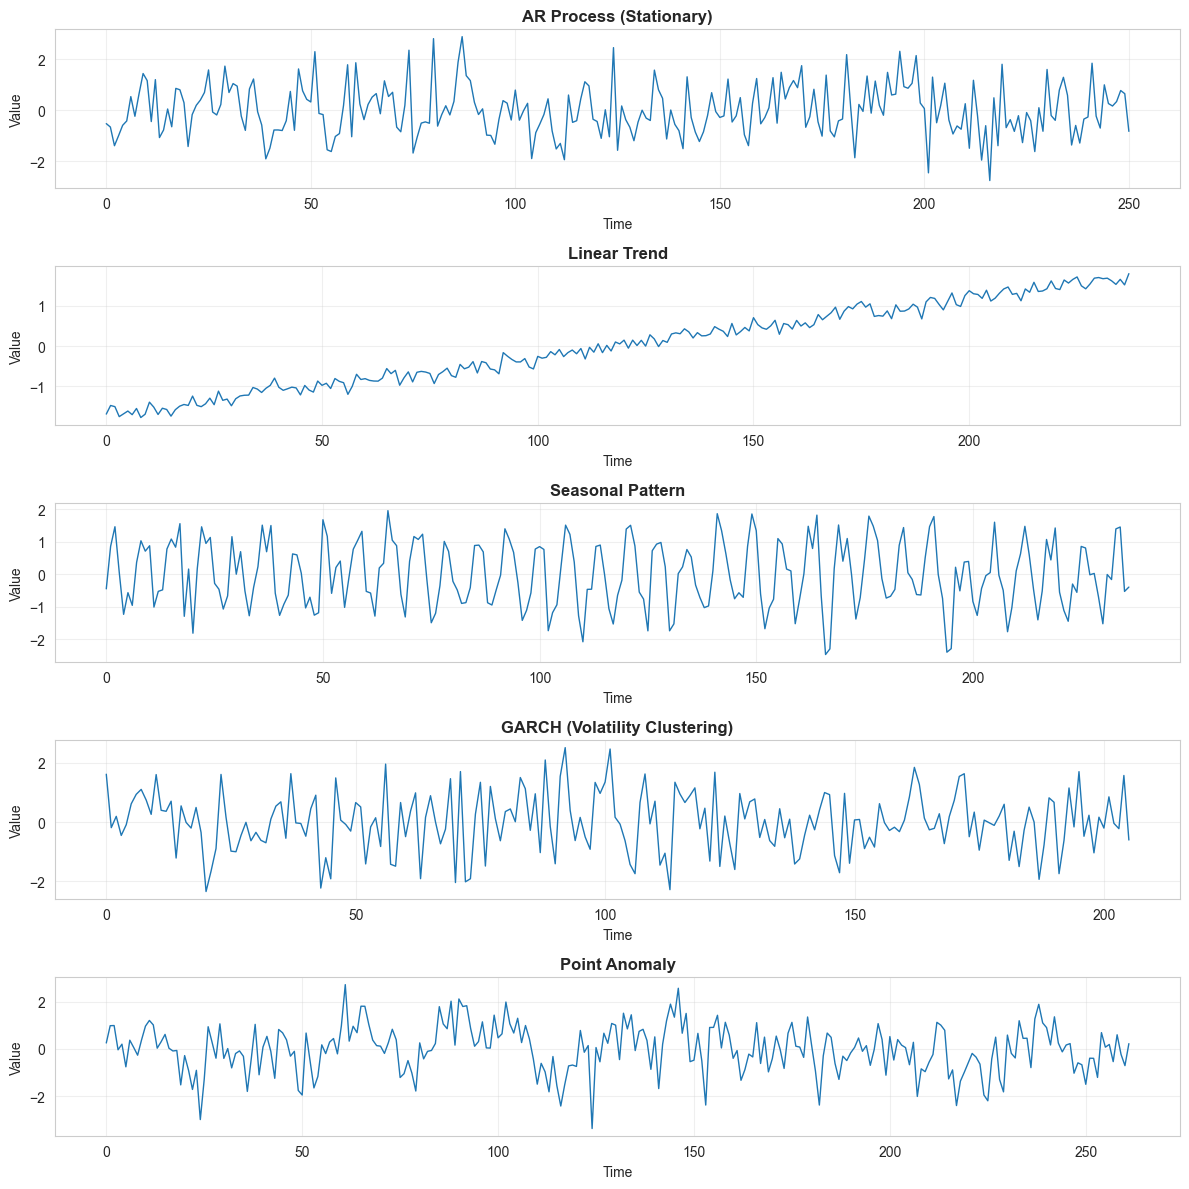

In [41]:
# Load different datasets
df_ar = pd.read_parquet(output_dir / 'ar.parquet')
df_trend = pd.read_parquet(output_dir / 'trend.parquet')
df_seasonal = pd.read_parquet(output_dir / 'seasonal.parquet')
df_garch = pd.read_parquet(output_dir / 'garch.parquet')
df_anomaly = pd.read_parquet(output_dir / 'anomaly.parquet')

# Plot one series from each type
import matplotlib.pyplot as plt

fig, axes = plt.subplots(5, 1, figsize=(12, 12))

datasets = [
    (df_ar, 'AR Process (Stationary)'),
    (df_trend, 'Linear Trend'),
    (df_seasonal, 'Seasonal Pattern'),
    (df_garch, 'GARCH (Volatility Clustering)'),
    (df_anomaly, 'Point Anomaly')
]

for idx, (data, title) in enumerate(datasets):
    series_id = data['series_id'].iloc[0]
    series_data = data[data['series_id'] == series_id]
    axes[idx].plot(series_data['time'], series_data['data'], linewidth=1)
    axes[idx].set_title(title, fontsize=12, fontweight='bold')
    axes[idx].set_xlabel('Time')
    axes[idx].set_ylabel('Value')
    axes[idx].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


### 3.4 ACF/PACF Analysis


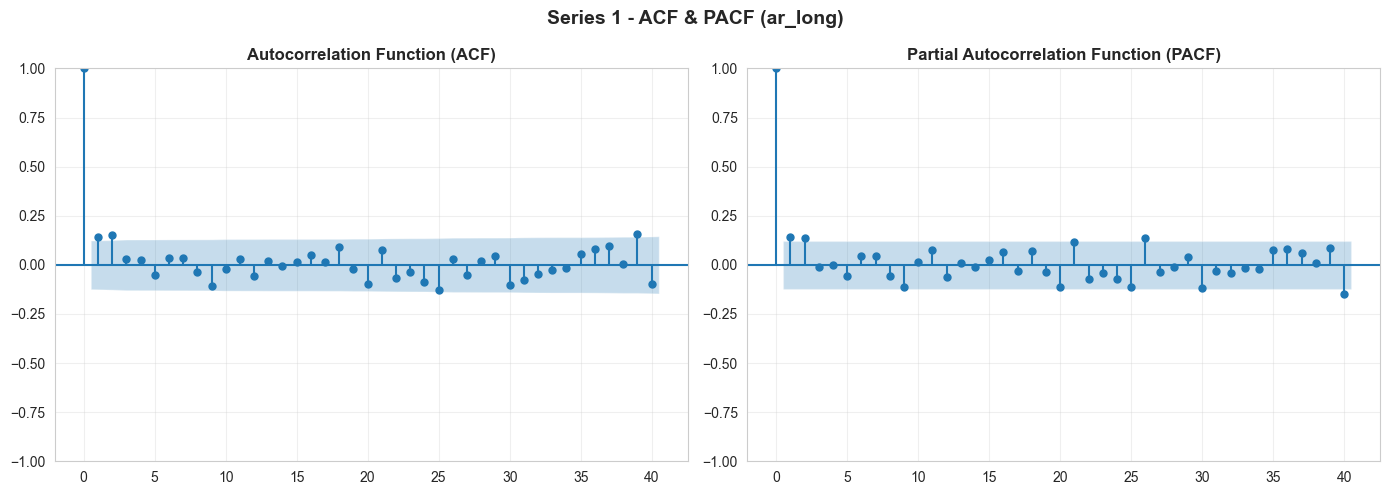

In [26]:
# Plot ACF and PACF for AR process
try:
    plot_acf_pacf(
        df_ar,
        series_id=df_ar['series_id'].iloc[0],
        lags=40,
        save_path=None
    )
except ImportError:
    print("⚠ statsmodels not installed. Install with: pip install statsmodels")


### 3.5 Comprehensive Dashboard


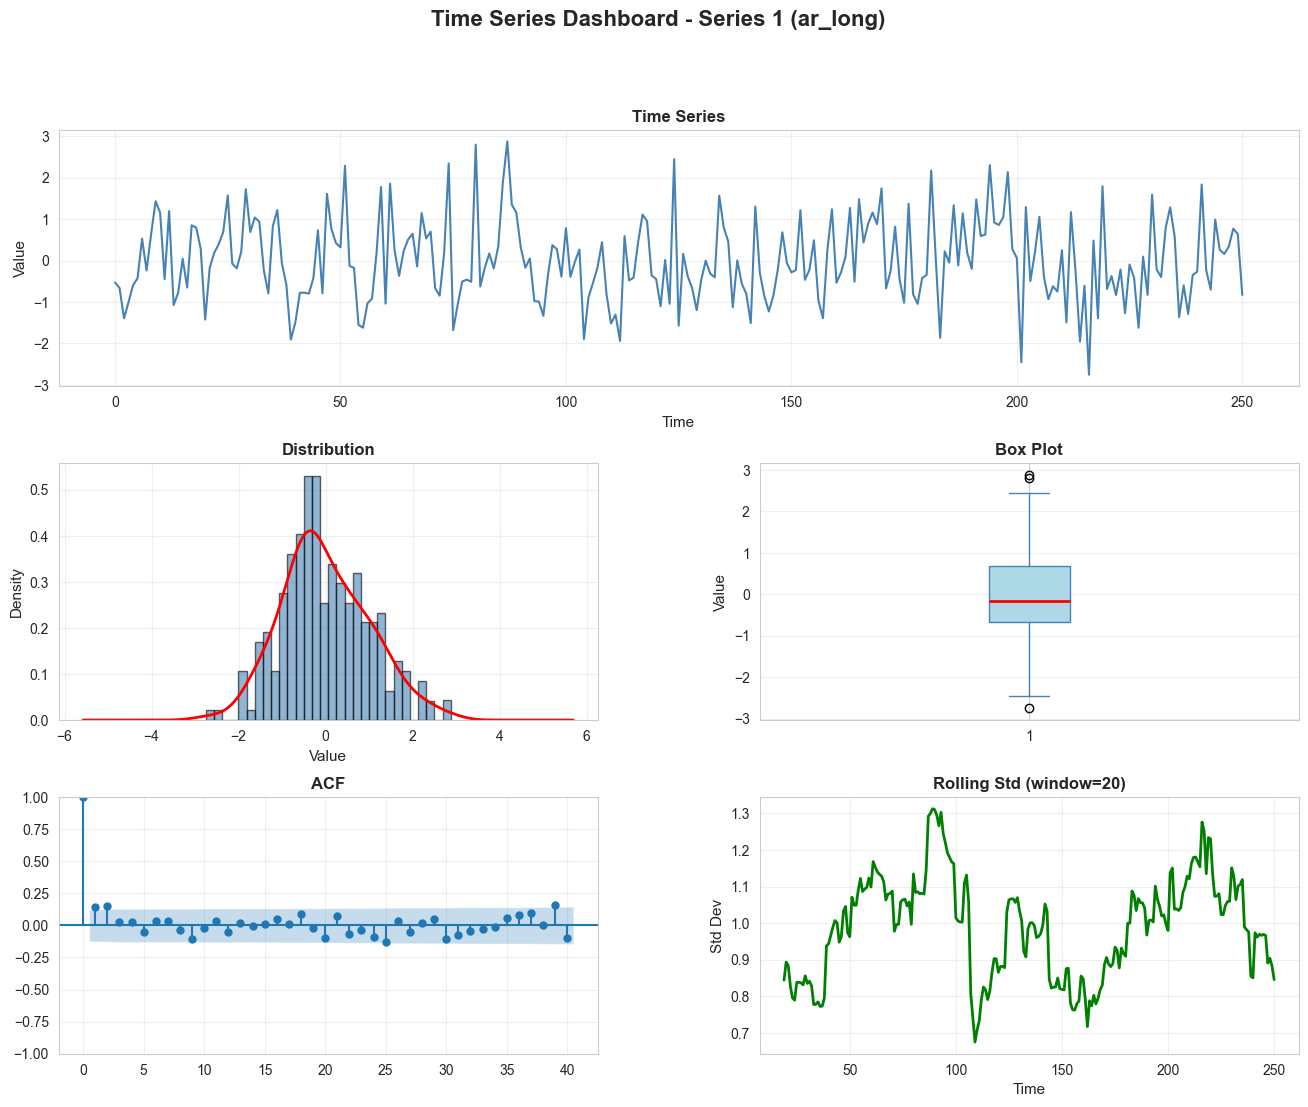

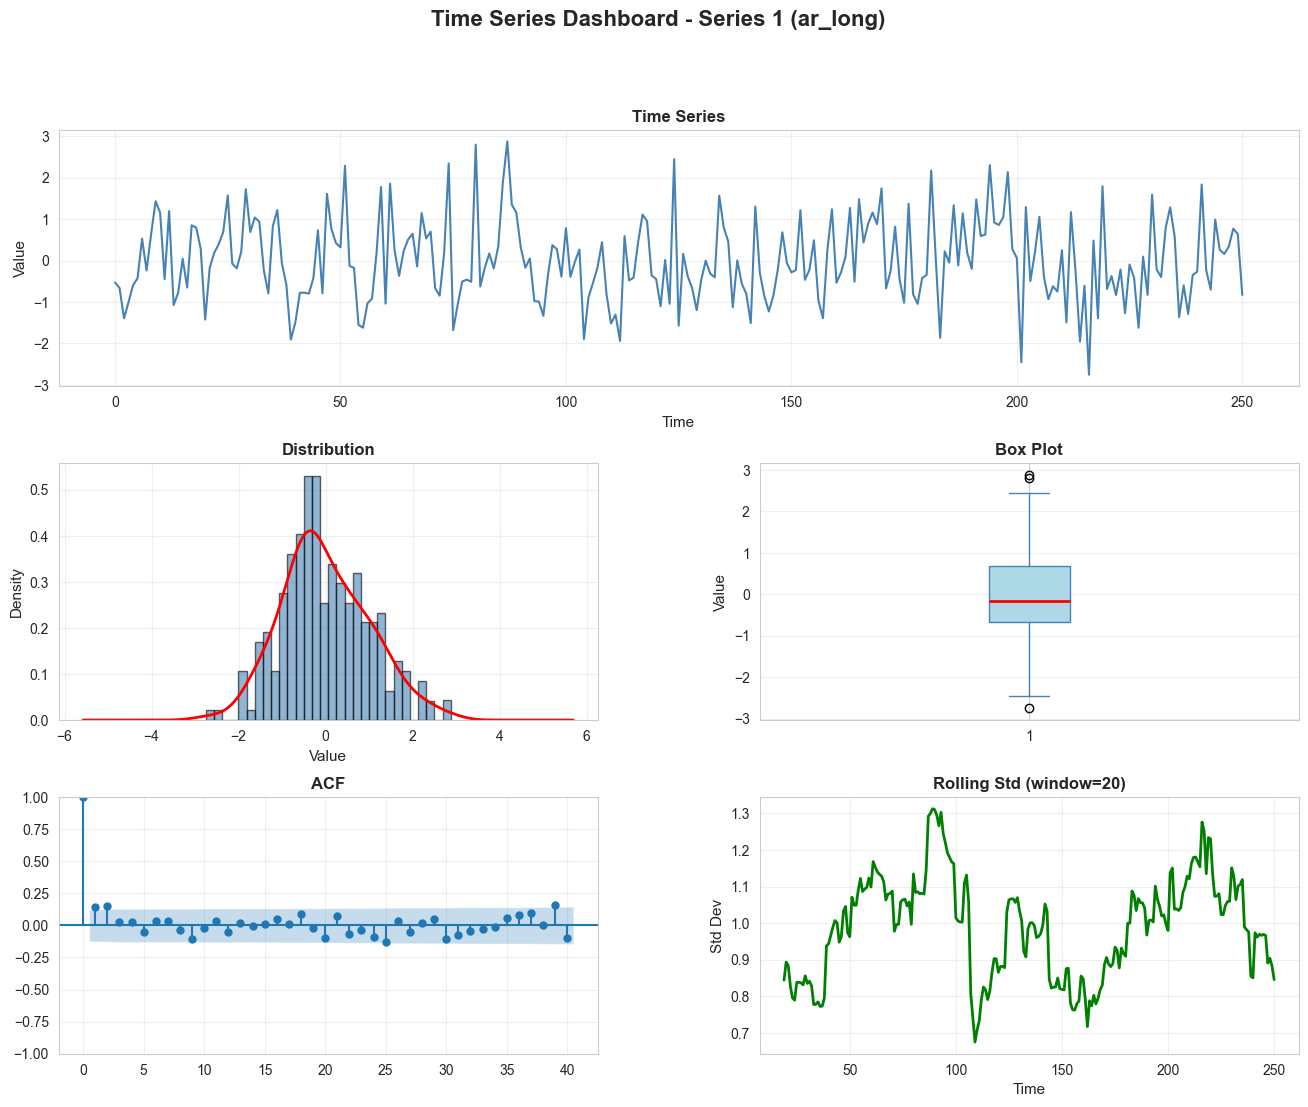

In [27]:
# Create a comprehensive dashboard for one series
create_dashboard(
    df_ar,
    series_id=df_ar['series_id'].iloc[0],
    save_path=None
)


## 4. Statistical Analysis

### 4.1 Dataset Summary


In [28]:
# Analyze dataset summary
summary = analyze_dataset_summary(df_ar)
print("\nDataset Summary:")
summary



Dataset Summary:


,series_id,length,label,mean,median,std,var,min,max,range,...,skewness,kurtosis,cv,is_stationary,adf_pvalue,has_trend,trend_direction,trend_slope,has_seasonality,dominant_period
0,1,251,ar_long,3.892415e-17,-0.172247,1.0,1.0,-2.755351,2.876355,5.631707,...,0.291917,-0.021672,2.569099e+16,True,7.194552e-15,False,no trend,-0.000247,False,NaN
1,2,277,ar_long,-2.885778e-17,-0.070133,1.0,1.0,-2.754411,3.333464,6.087875,...,0.243430,0.082625,-3.465270e+16,True,3.102486e-10,False,no trend,-0.000054,True,4.0
2,3,203,ar_long,1.312579e-17,0.048257,1.0,1.0,-2.614946,2.897060,5.512006,...,-0.110578,0.058818,7.618589e+16,True,8.765532e-29,False,no trend,0.000377,False,NaN


### 4.2 Stationarity Test


In [42]:
# Test stationarity of different series
print("Stationarity Tests:\n")

test_datasets = [
    (df_ar, "AR Process"),
    (df_trend, "Linear Trend"),
    (df_seasonal, "Seasonal")
]

for data, name in test_datasets:
    series_id = data['series_id'].iloc[0]
    result = test_stationarity(data, series_id)
    
    print(f"{name}:")
    
    # Check for errors
    if 'error' in result:
        print(f"  Error: {result['error']}")
        print()
        continue
    
    # Print test results (using correct keys from analysis.py)
    if 'test_statistic' in result:
        print(f"  ADF Statistic: {result['test_statistic']:.4f}")
    
    if 'p_value' in result:
        print(f"  p-value: {result['p_value']:.4f}")
    
    if 'is_stationary' in result:
        print(f"  Is Stationary: {result['is_stationary']}")
    
    if 'conclusion' in result:
        print(f"  Conclusion: {result['conclusion']}")
    
    print()


Stationarity Tests:

AR Process:
  ADF Statistic: -8.9837
  p-value: 0.0000
  Is Stationary: True
  Conclusion: Stationary

Linear Trend:
  ADF Statistic: -0.3360
  p-value: 0.9202
  Is Stationary: False
  Conclusion: Non-stationary

Seasonal:
  ADF Statistic: -3.7471
  p-value: 0.0035
  Is Stationary: True
  Conclusion: Stationary



### 4.3 Seasonality Detection


In [43]:
# Detect seasonality
series_id = df_seasonal['series_id'].iloc[0]
seasonality_result = detect_seasonality(df_seasonal, series_id)

print("Seasonality Detection:")

# Check for errors
if 'error' in seasonality_result:
    print(f"  Error: {seasonality_result['error']}")
else:
    # Print results (using correct keys from analysis.py)
    if 'has_seasonality' in seasonality_result:
        print(f"  Has Seasonality: {seasonality_result['has_seasonality']}")
    
    if 'period' in seasonality_result and seasonality_result['period'] is not None:
        print(f"  Detected Period: {seasonality_result['period']}")
    
    if 'strength' in seasonality_result and seasonality_result['strength'] is not None:
        print(f"  Strength: {seasonality_result['strength']:.4f}")


Seasonality Detection:
  Has Seasonality: True


## 5. Summary

This notebook demonstrated:

1. ✓ **Generation**: Created 5 different types of time series (AR, Trend, Seasonal, GARCH, Anomaly)
2. ✓ **Loading**: Loaded and inspected parquet files with metadata
3. ✓ **Visualization**: Plotted single/multiple series, ACF/PACF, and dashboards
4. ✓ **Analysis**: Performed stationarity tests and seasonality detection

### Next Steps:

- Explore more generator types in `timeseries_dataset_generator.generators`
- Try different visualization functions in `utils.visualization`
- Use analysis functions in `utils.analysis` for deeper insights
- Check out the full documentation in the README and guides

### Learn More:

- [README.md](../README.md) - Full library documentation
- [QUICK_START_GUIDE.md](../QUICK_START_GUIDE.md) - Quick reference
- [VISUALIZATION_AND_ANALYSIS_GUIDE.md](../docs/VISUALIZATION_AND_ANALYSIS_GUIDE.md) - Complete API reference
- [examples/](.) - More example scripts


## 6. Cleanup (Optional)

Uncomment to remove generated files:

In [44]:
 import shutil
 if output_dir.exists():
     shutil.rmtree(output_dir)
     print(f"✓ Cleaned up {output_dir}")


✓ Cleaned up notebook_output
